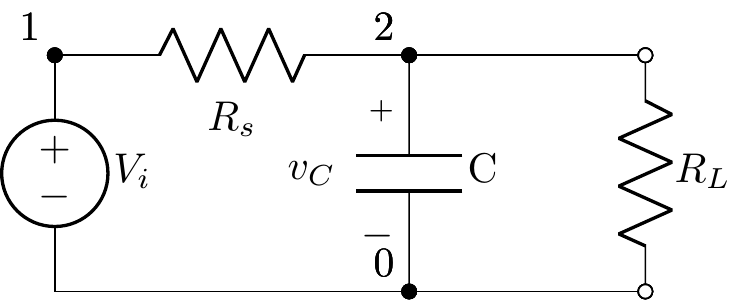

In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
Rs 1 2; right, size=1.5
C 2 0; down, v=v_C
W1 0_1 0; right
W2 0 0_2; right
P1 2_2 0_2; down
RL 2_2 0_2; down
W3 2 2_2;right""")
cct.draw()

In [2]:
H = cct.RL.V(s) / cct.Vi.V(s)

In [3]:
H(j * omega)


            ⅉ⋅ω             
────────────────────────────
     ⎛   2   ⅉ⋅ω⋅(R_L + Rₛ)⎞
C⋅Rₛ⋅⎜- ω  + ──────────────⎟
     ⎝          C⋅R_L⋅Rₛ   ⎠

In [4]:

H(j * omega).magnitude


               R_L               
─────────────────────────────────
   ______________________________
  ╱  2    2   2  2             2 
╲╱  C ⋅R_L ⋅Rₛ ⋅ω  + (R_L + Rₛ)  

In [5]:
H(j * omega).phase_degrees

         ⎛C⋅R_L⋅Rₛ⋅ω⎞ 
-180⋅aₜₐₙ⎜──────────⎟ 
         ⎝ R_L + Rₛ ⎠ 
──────────────────────
          π           

In [6]:
H1 = H.subs('C', 1e-9).subs('Rs', 25e3).subs('RL', 5e3)
H1(j * omega)

    40000⋅ⅉ⋅ω    
─────────────────
   2             
- ω  + 240000⋅ⅉ⋅ω

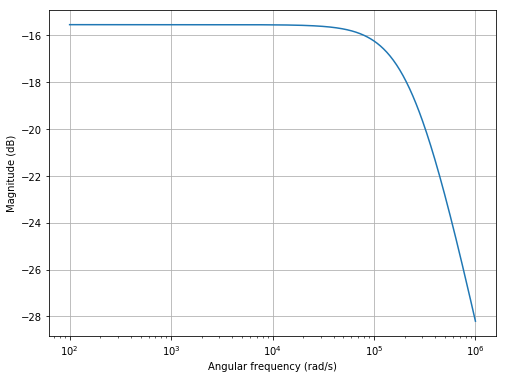

In [7]:
from numpy import logspace
w = logspace(2, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

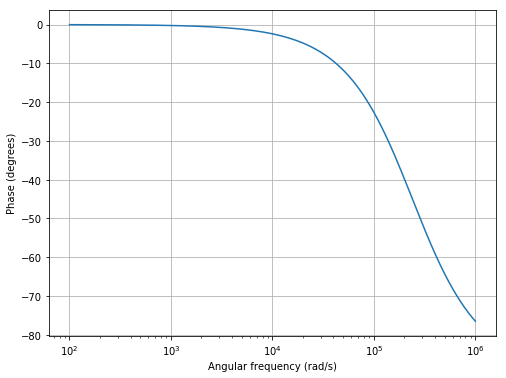

In [8]:

ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)